In [8]:
import os
import json
import numpy as np
import bibtexparser
from geopy.geocoders import Nominatim
geolocator = Nominatim()
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [2]:
conference = "../../CV/Troupin_conferences.bib"

In [3]:
confDict = {}

with open(conference) as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

for conf in bib_database.entries:
    try:
        address = conf["address"]
        address.replace("{", "").replace("}", "")
        if address in confDict.keys():
            # print("Already in the list")
            confDict[address][-1] += 1
        else:
            # print("new address")
            location = geolocator.geocode(address, timeout=20)
            confDict[address] = [location.longitude, location.latitude, 1]
            
    except KeyError:
        print("no address for entry: {}".format(conf["ID"]))

In [73]:
confDict["Li\\`{e}ge, Belgium"][0] = 5.5734203
confDict["Li\\`{e}ge, Belgium"][1] = 50.6451381

## Global map

In [98]:
# Create basemaps
m = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80.,
            urcrnrlon=180., urcrnrlat=80.,
            lat_ts=0., resolution='l')

In [103]:
lon = []
lat = []
num = []
for key, value in confDict.items():
    lon.append(value[0])
    lat.append(value[1])
    num.append(value[2])

In [100]:
def get_col(value):
    
    if value == 1:
        col = '#2b83ba'
    elif value > 1 and value <=2:
        col = '#abdda4'
    elif value > 2 and value <=5:
        col = '#FFEA2C'
    elif value > 5 and value <=10:
        col = '#FF9C2C'
    elif value > 10:
        col = '#d7191c'
    
    return col

In [105]:
def make_conf_map(lon, lat, num, m, figname):
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    m.drawcountries(linewidth=.5, color="w", zorder=4)
    # m.drawcoastlines(linewidth=.1, color=".2", zorder=5)
    m.fillcontinents()

    colorlist = ['#2b83ba','#abdda4','#FFEA2C','#FF9C2C','#d7191c']
    ncat = len(colorlist)
    bound = np.linspace(0, 1, ncat)
    cmap = LinearSegmentedColormap.from_list("ok", colorlist, N=ncat)

    for llon, llat, nnum in zip(lon, lat, num):
        lonp, latp = m(llon, llat)
        plt.plot(lonp, latp, 'o', markerfacecolor="w", markeredgecolor='w', ms=0.1)
        plt.text(lonp, latp, "\uf3c5", fontproperties=fp1, color=get_col(nnum),
                 fontsize=8, ha="center", va="bottom", zorder=7)

    plt.legend([mpatches.Patch(color=cmap(b)) for b in bound], 
               ["1", "2", "3$-$5", "6$-$10","10+" ])
    plt.savefig(figname, dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

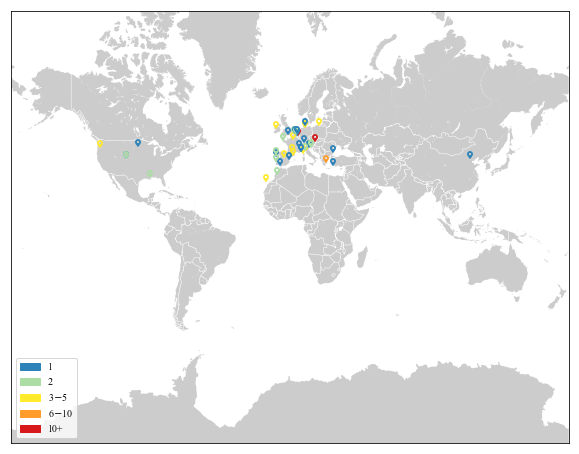

In [106]:
make_conf_map(lon, lat, num, m, "ConferenceMap")

## European map

In [108]:
# Create basemaps
m2 = Basemap(projection='merc', llcrnrlon=-20, llcrnrlat=25.,
            urcrnrlon=40., urcrnrlat=60.,
            lat_ts=30., resolution='l')

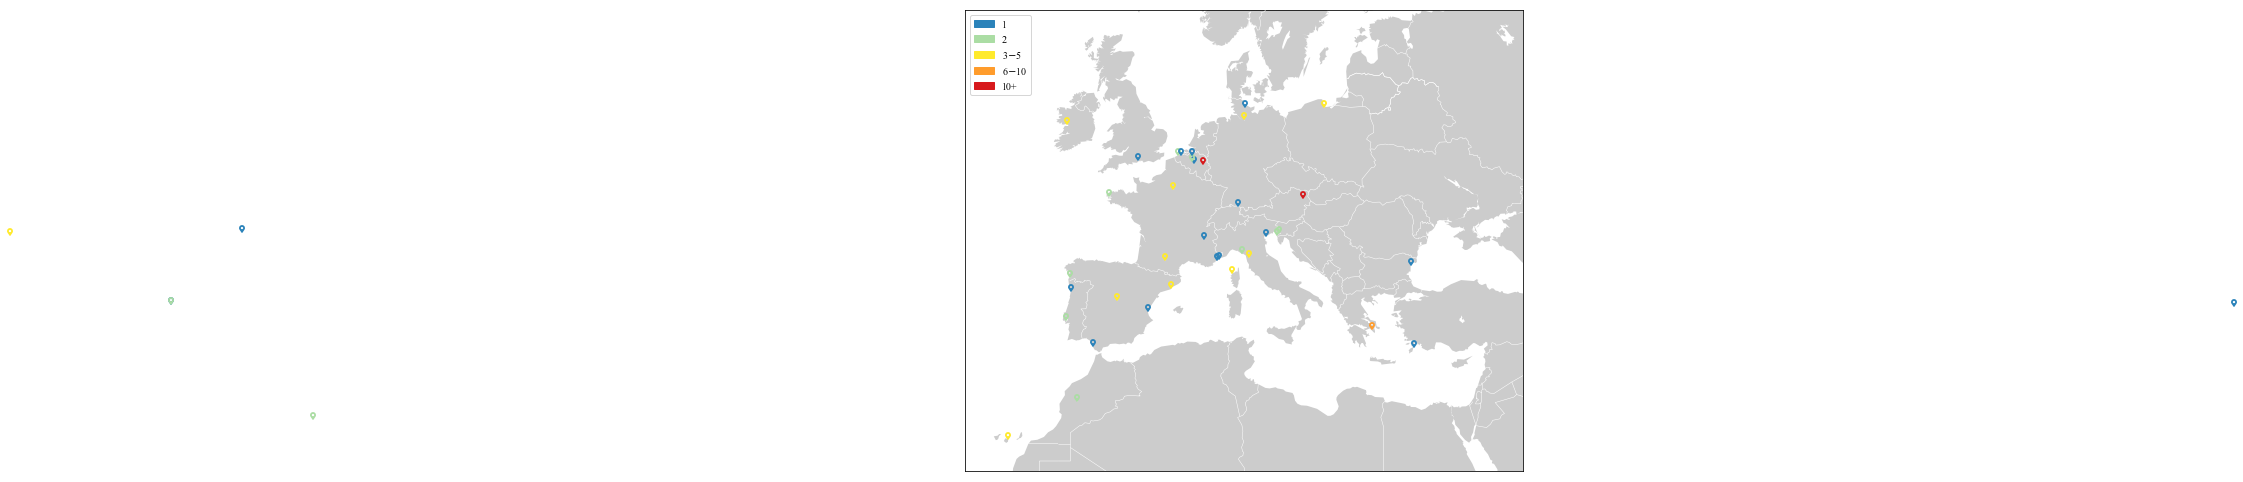

In [109]:
make_conf_map(lon, lat, num, m2, "ConferenceMapEurope")